In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD

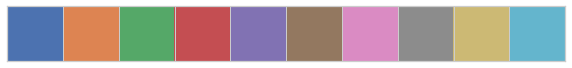

In [229]:
#set colors
sns.set(style="whitegrid", palette="deep")
sns.palplot(sns.color_palette())

In [230]:
def get_idx(data, i):
    return data.applymap(lambda x: x[i] if pd.notnull(x) else np.nan)

In [259]:
def clean_recipe(file):
    df = pd.read_pickle(file)
    df = df.drop([1, 2], axis=1).drop(["KPCA"], axis=0)
    df.columns = ["TR-3", "TR-4", "TR-5", "SR-5", "SR-4", "SR-3"]
    df = df[["TR-3", "TR-4", "TR-5", "SR-3", "SR-4", "SR-5"]]
    return df

def clean_user(file):
    df = pd.read_pickle(file)
    df = df.drop(["MinCutNN"], axis=1)
    df = df[["kNN", "NNBall", "KMeans", "GMM", "MinCut", "DBSCAN", "KMeansNN", "GMMNN", "DBSCANNN"]]
    return df

In [260]:
recipe_Rhat_com = clean_recipe("results/recipe_Rhat_com.pkl")
recipe_Rhat_int = clean_recipe("results/recipe_Rhat_int.pkl")
recipe_R_com = clean_recipe("results/recipe_R_com.pkl")
recipe_R_int = clean_recipe("results/recipe_R_int.pkl")
user_Uhat_com = clean_user("results/user_Uhat_com.pkl")
user_Uhat_int = clean_user("results/user_Uhat_int.pkl")
user_U_com = clean_user("results/user_U_com.pkl")
user_U_int = clean_user("results/user_U_int.pkl")

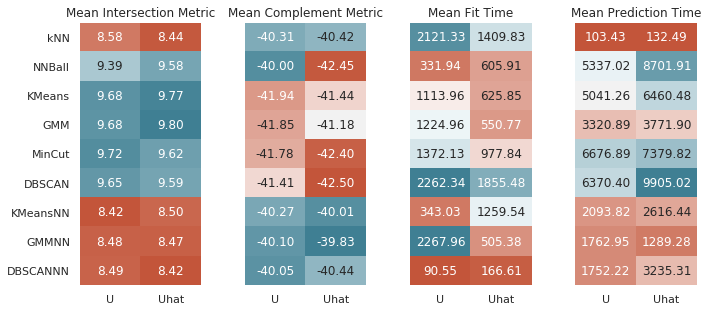

In [261]:
fig, ax = plt.subplots(1, 4, figsize=(10,4.5))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Uint = get_idx(user_U_int, 0).mean().rename('U')
Uhatint = get_idx(user_Uhat_int, 0).mean().rename('Uhat')
ints = pd.concat([Uint, Uhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")

#Complement
Ucom = get_idx(user_U_com, 0).mean().rename('U')
Uhatcom = get_idx(user_Uhat_com, 0).mean().rename('Uhat')
coms = pd.concat([Ucom, Uhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Uhat = (get_idx(user_Uhat_com, 1) + get_idx(user_Uhat_int, 1)).mean().rename('Uhat')/2
U = (get_idx(user_U_com, 1) + get_idx(user_U_int, 1)).mean().rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Uhat = (get_idx(user_Uhat_com, 2) + get_idx(user_Uhat_int, 2)).mean().rename('Uhat')/2
U = (get_idx(user_U_com, 2) + get_idx(user_U_int, 2)).mean().rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("figs/user_rdr.pdf", bbox_inches="tight")
plt.show()

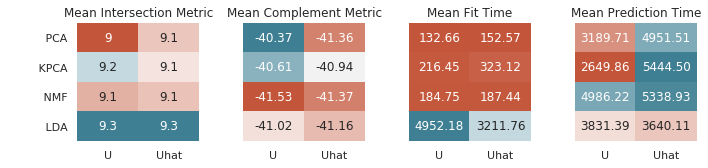

In [283]:
fig, ax = plt.subplots(1, 4, figsize=(10,2.5))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Uint = get_idx(user_U_int, 0).mean(axis=1).rename('U')
Uhatint = get_idx(user_Uhat_int, 0).mean(axis=1).rename('Uhat')
ints = pd.concat([Uint, Uhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False)
ax[0].set_title("Mean Intersection Metric")
ax[0].set_yticklabels(["         " + i.get_text() for i in ax[0].get_yticklabels()], rotation=0)

#Complement
Ucom = get_idx(user_U_com, 0).mean(axis=1).rename('U')
Uhatcom = get_idx(user_Uhat_com, 0).mean(axis=1).rename('Uhat')
coms = pd.concat([Ucom, Uhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Uhat = (get_idx(user_Uhat_com, 1) + get_idx(user_Uhat_int, 1)).mean(axis=1).rename('Uhat')/2
U = (get_idx(user_U_com, 1) + get_idx(user_U_int, 1)).mean(axis=1).rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Uhat = (get_idx(user_Uhat_com, 2) + get_idx(user_Uhat_int, 2)).mean(axis=1).rename('Uhat')/2
U = (get_idx(user_U_com, 2) + get_idx(user_U_int, 2)).mean(axis=1).rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("figs/user_dr.pdf", bbox_inches="tight")
plt.show()

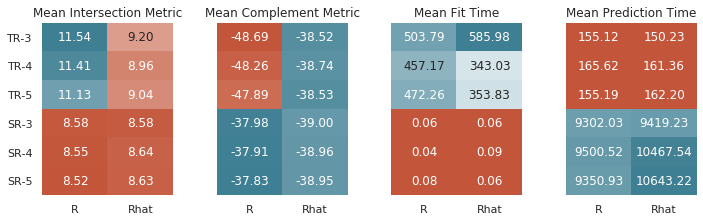

In [264]:
fig, ax = plt.subplots(1, 4, figsize=(10,3.25))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Rint = get_idx(recipe_R_int, 0).mean().rename('R')
Rhatint = get_idx(recipe_Rhat_int, 0).mean().rename('Rhat')
ints = pd.concat([Rint, Rhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

#Complement
Rcom = get_idx(recipe_R_com, 0).mean().rename('R')
Rhatcom = get_idx(recipe_Rhat_com, 0).mean().rename('Rhat')
coms = pd.concat([Rcom, Rhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Rhat = (get_idx(recipe_Rhat_com, 1) + get_idx(recipe_Rhat_int, 1)).mean().rename('Rhat')/2
R = (get_idx(recipe_R_com, 1) + get_idx(recipe_R_int, 1)).mean().rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Rhat = (get_idx(recipe_Rhat_com, 2) + get_idx(recipe_Rhat_int, 2)).mean().rename('Rhat')/2
R = (get_idx(recipe_R_com, 2) + get_idx(recipe_R_int, 2)).mean().rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])


plt.tight_layout()
plt.savefig("figs/recipe_rdr.pdf", bbox_inches="tight")
plt.show()

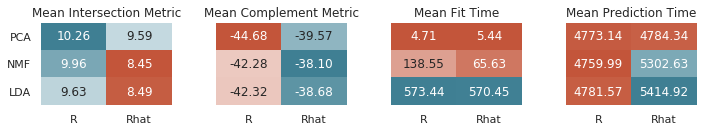

In [254]:
fig, ax = plt.subplots(1, 4, figsize=(10,2))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Rint = get_idx(recipe_R_int, 0).mean(axis=1).rename('R')
Rhatint = get_idx(recipe_Rhat_int, 0).mean(axis=1).rename('Rhat')
ints = pd.concat([Rint, Rhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

#Complement
Rcom = get_idx(recipe_R_com, 0).mean(axis=1).rename('R')
Rhatcom = get_idx(recipe_Rhat_com, 0).mean(axis=1).rename('Rhat')
coms = pd.concat([Rcom, Rhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Rhat = (get_idx(recipe_Rhat_com, 1) + get_idx(recipe_Rhat_int, 1)).mean(axis=1).rename('Rhat')/2
R = (get_idx(recipe_R_com, 1) + get_idx(recipe_R_int, 1)).mean(axis=1).rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Rhat = (get_idx(recipe_Rhat_com, 2) + get_idx(recipe_Rhat_int, 2)).mean(axis=1).rename('Rhat')/2
R = (get_idx(recipe_R_com, 2) + get_idx(recipe_R_int, 2)).mean(axis=1).rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])


plt.tight_layout()
plt.savefig("figs/recipe_dr.pdf", bbox_inches="tight")
plt.show()

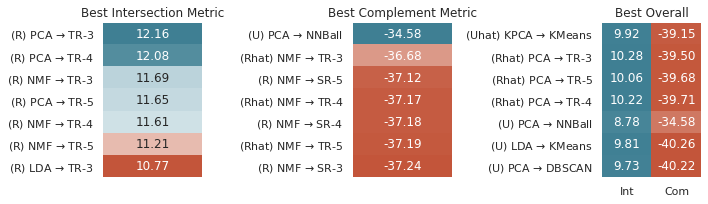

In [413]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))
cmap = sns.diverging_palette(20, 220, n=200)
n = 7

def add_multi_index(df, idx):
    old_idx = df.index.to_frame()
    old_idx.insert(0, 2, idx)
    df.index = pd.MultiIndex.from_frame(old_idx)
    return df

#Intersection Metric
Rint = add_multi_index( get_idx(recipe_R_int, 0).stack(), "R")
Rhatint = add_multi_index( get_idx(recipe_Rhat_int, 0).stack(), "Rhat")
Uint = add_multi_index( get_idx(user_U_int, 0).stack(), "U")
Uhatint = add_multi_index( get_idx(user_Uhat_int, 0).stack(), "Uhat")
tog = pd.concat([Rint, Rhatint, Uint, Uhatint])

best = tog.nlargest(n)
idx = [fr"({i[0]}) {i[1]} $\to$ {i[2]}" for i in best.index]
sns.heatmap(best.values.reshape(-1,1), yticklabels=idx, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Best Intersection Metric")
ax[0].get_xaxis().set_ticks([])

#Complement Metric
Rcom = add_multi_index( get_idx(recipe_R_com, 0).stack(), "R")
Rhatcom = add_multi_index( get_idx(recipe_Rhat_com, 0).stack(), "Rhat")
Ucom = add_multi_index( get_idx(user_U_com, 0).stack(), "U")
Uhatcom = add_multi_index( get_idx(user_Uhat_com, 0).stack(), "Uhat")
tog = pd.concat([Rcom, Rhatcom, Ucom, Uhatcom])

best = tog.nlargest(n)
idx = [fr"({i[0]}) {i[1]} $\to$ {i[2]}" for i in best.index]
sns.heatmap(best.values.reshape(-1,1), yticklabels=idx, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Best Complement Metric")
ax[1].get_xaxis().set_ticks([])


## BEST OVERALL
Rint = add_multi_index( get_idx(recipe_R_int, 0).stack(), "R")
Rhatint = add_multi_index( get_idx(recipe_Rhat_int, 0).stack(), "Rhat")
Uint = add_multi_index( get_idx(user_U_int, 0).stack(), "U")
Uhatint = add_multi_index( get_idx(user_Uhat_int, 0).stack(), "Uhat")
tog = pd.concat([Rint, Rhatint, Uint, Uhatint])

tog_int = tog.sort_values(ascending=False)
best_int =  pd.Series(np.arange(1,len(tog_int)+1), index=tog_int.index)

Rcom = add_multi_index( get_idx(recipe_R_com, 0).stack(), "R")
Rhatcom = add_multi_index( get_idx(recipe_Rhat_com, 0).stack(), "Rhat")
Ucom = add_multi_index( get_idx(user_U_com, 0).stack(), "U")
Uhatcom = add_multi_index( get_idx(user_Uhat_com, 0).stack(), "Uhat")
tog = pd.concat([Rcom, Rhatcom, Ucom, Uhatcom])

tog_com = tog.sort_values(ascending=False)
best_com =  pd.Series(np.arange(1,len(tog_com)+1), index=tog_com.index)

df = pd.DataFrame({"Int": tog_int, "Com": tog_com, "bint": best_int, "bcom": best_com})
df['best'] = (df['bint'] + df['bcom'] ) /2
df = df.sort_values('best')

best = df.nsmallest(n, columns='best')[['Int', 'Com']]
idx = [fr"({i[0]}) {i[1]} $\to$ {i[2]}" for i in best.index]
sns.heatmap(best, yticklabels=idx, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Best Overall")
ax[2].set_ylabel('')

plt.tight_layout()
plt.savefig("figs/best_metric.pdf", bbox_inches="tight")
plt.show()

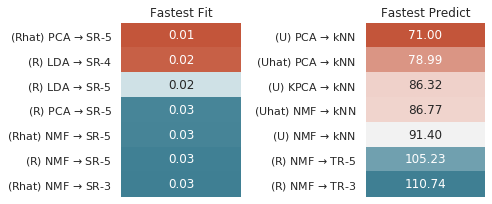

In [415]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

#Fastest Fit
Rcom = add_multi_index( get_idx(recipe_R_com, 1).stack(), "R")
Rhatcom = add_multi_index( get_idx(recipe_Rhat_com, 1).stack(), "Rhat")
Ucom = add_multi_index( get_idx(user_U_com, 1).stack(), "U")
Uhatcom = add_multi_index( get_idx(user_Uhat_com, 1).stack(), "Uhat")
tog = pd.concat([Rcom, Rhatcom, Ucom, Uhatcom])

best = tog.nsmallest(n)
idx = [fr"({i[0]}) {i[1]} $\to$ {i[2]}" for i in best.index]
sns.heatmap(best.values.reshape(-1,1), yticklabels=idx, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Fastest Fit")
ax[0].get_xaxis().set_ticks([])

#Fastest Predict
Rcom = add_multi_index( get_idx(recipe_R_com, 2).stack(), "R")
Rhatcom = add_multi_index( get_idx(recipe_Rhat_com, 2).stack(), "Rhat")
Ucom = add_multi_index( get_idx(user_U_com, 2).stack(), "U")
Uhatcom = add_multi_index( get_idx(user_Uhat_com, 2).stack(), "Uhat")
tog = pd.concat([Rcom, Rhatcom, Ucom, Uhatcom])

best = tog.nsmallest(n)
idx = [fr"({i[0]}) {i[1]} $\to$ {i[2]}" for i in best.index]
sns.heatmap(best.values.reshape(-1,1), yticklabels=idx, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Fastest Predict")
ax[1].get_xaxis().set_ticks([])

plt.tight_layout()
plt.savefig("figs/best_time.pdf", bbox_inches="tight")
plt.show()